In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from quantum_tools.contexts.quantum_caller import *
from quantum_tools.statistics import *
from quantum_tools.examples.symbolic_contexts import *
from quantum_tools.examples.prob_dists import *
from quantum_tools.rmt.unitary_param import *
from quantum_tools.rmt.utils import *
from quantum_tools.utilities import utils
from quantum_tools.statistics.probability import *
from quantum_tools.visualization.transversal_inequalities import *
from quantum_tools.config import *
from quantum_tools.inflation import marginal_equality
from itertools import permutations
import numpy as np
from scipy import optimize
from quantum_tools.visualization.triangle_plot import *

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = False
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

In [4]:
rvc = RandomVariableCollection.new(('A', 'B', 'C'), (4, 4, 4))
triangle_permutation = utils.get_triangle_permutation(2)
symbolic_context = ABC_444_444
preinjectable_sets = symbolic_context.preinjectable_sets
symbolic_context = SymbolicContext(preinjectable_sets, symbolic_context.outcomes)
infl_rvc = RandomVariableCollection.new(
    names=marginal_equality.rv_names_from_sc(preinjectable_sets),
    outcomes=symbolic_context.outcomes
)
b_string = get_preinjectablesets_latex(infl_rvc, preinjectable_sets)

In [5]:
b_string

array(['P_{ABC}(000)P_{ABC}(000)', 'P_{ABC}(000)P_{ABC}(001)', 'P_{ABC}(000)P_{ABC}(002)', ...,
       'P_{A}(3)P_{B}(3)P_{C}(1)', 'P_{A}(3)P_{B}(3)P_{C}(2)', 'P_{A}(3)P_{B}(3)P_{C}(3)'], 
      dtype='<U24')

In [6]:
result_backlog = []

def minimize_callback(f):
    logged_results = []
    result_backlog.append(logged_results)
    def _callback(x, *args, **kwargs):
        result = f(x)
        print(result)
        print(result, end='\r')
        logged_results.append(result)
    return _callback

def stochastic_jump(x, scale_std=0.001):
    norm_x = np.linalg.norm(x)
    delta_x = np.random.normal(0.0, scale_std*(2 * np.pi), x.shape)
    return x + delta_x

def plot_gd(h_f):
    plt.figure()
    plt.xlabel('Gradient Descent Step')
    plt.ylabel('Inequality Target')
    plt.title('Violations')
    plt.plot(np.arange(len(h_f)), h_f)
    # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([0, len(h_f), h_f.min(), h_f.max()])
    plt.grid(True)
    plt.show()
    
def plot_results(results):
    results = np.asarray(results)
    plt.figure()
    plt.xlabel('Step')
    plt.ylabel('Inequality Target')
    plt.title('Minimize Results')
    plt.plot(np.arange(len(results)), results)
    # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([0, len(results), results.min(), results.max()])
    plt.grid(True)
    plt.show()

In [7]:
def w_to_target(w):
    def _w_to_target(pd):
        b = marginal_equality.contexts_marginals(pd, preinjectable_sets)
        return np.sum(w * b)
    return _w_to_target

def w_to_target_sym(w):
    def _w_to_target(pd):
        b = marginal_equality.contexts_marginals(pd, preinjectable_sets)
        return np.sum(w * symmetrizingmatrix.dot(b))
    return _w_to_target

def pd_matching(pd_target):
    def _pd_matching(pd):
        return ProbDist.distance(pd, pd_target)
    return _pd_matching

In [8]:
fritz_param = np.loadtxt(utils.temp_dir('fritz_param.csv'))
# mosekcert = np.loadtxt(utils.temp_dir('mosekcert.csv'))
# gurobicert = np.loadtxt(utils.temp_dir('gurobicert.csv'))
transversal_hardy = np.loadtxt(utils.temp_dir('transversal_hardy.csv'))
# transversal_symmetric_hardy = np.loadtxt(utils.temp_dir('transversal_symmetric_hardy.csv'))
# mebs_non_accessible = np.loadtxt(utils.temp_dir('mebs_non_accessible.csv'))
# gurobicertnosymmetry = np.loadtxt(utils.temp_dir('gurobicertnosymmetry.csv'))
# mosekcertnosymmetry = np.loadtxt(utils.temp_dir('mosekcertnosymmetry.csv'))
# binarycert = np.loadtxt(utils.temp_dir('binarycert.csv'))
# GurobiCertFritzSym = np.loadtxt(utils.temp_dir('GurobiCertFritzSym.csv'))
# MosekCertFritzSym = np.loadtxt(utils.temp_dir('MosekCertFritzSym.csv'))
symmetrizingmatrix = np.loadtxt(utils.temp_dir('symmetrizingmatrix.csv'), delimiter=',')

In [9]:
nosymwitness_format = np.loadtxt(utils.temp_dir('nosymwitness.csv'), delimiter=',').astype(int)
nosymwitness = np.zeros(16896)
nosymwitness[nosymwitness_format[0, :] -1] = nosymwitness_format[1, :]

In [10]:
# twonewsymcertificates = np.loadtxt(utils.temp_dir('twonewsymcertificates.csv'),  delimiter=',')
# twonewsymcertificates_1, twonewsymcertificates_2 = twonewsymcertificates[0,:], twonewsymcertificates[1,:]

In [11]:
newsymcertificate = np.loadtxt(utils.temp_dir('newsymcertificate.csv'),  delimiter=',')
newsymcertificateFULL = np.loadtxt(utils.temp_dir('newsymcertificateFULL.csv'),  delimiter=',')
newsymcertificate2 = np.loadtxt(utils.temp_dir('newsymcertificate2.csv'),  delimiter=',')

In [12]:
nosymwitness

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [13]:
w_to_target(transversal_hardy)(fritz(rvc))

-0.0025658369120796082

In [14]:
import pickle
found = pickle.load(open(utils.temp_dir('found_fritz.pickle'), "rb"))

In [204]:
found[0]['w']

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

<IPython.core.display.Javascript object>


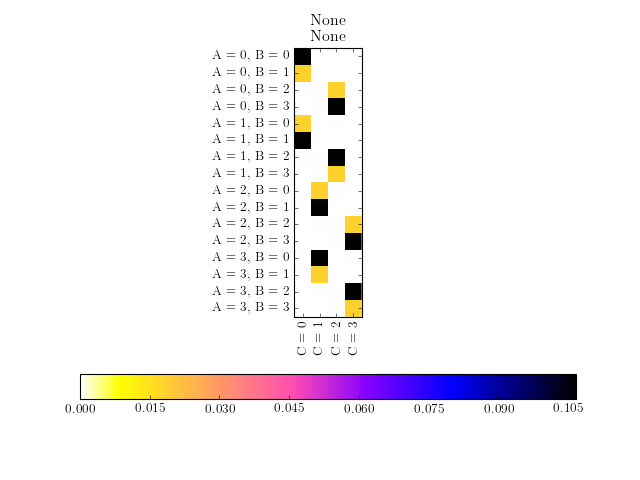

In [15]:
triangle_plot(fritz(rvc))

In [20]:
fritz(rvc)._support

array([[[ 0.10669,  0.     ,  0.     ,  0.     ],
        [ 0.01831,  0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.01831,  0.     ],
        [ 0.     ,  0.     ,  0.10669,  0.     ]],

       [[ 0.01831,  0.     ,  0.     ,  0.     ],
        [ 0.10669,  0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.10669,  0.     ],
        [ 0.     ,  0.     ,  0.01831,  0.     ]],

       [[ 0.     ,  0.01831,  0.     ,  0.     ],
        [ 0.     ,  0.10669,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     ,  0.01831],
        [ 0.     ,  0.     ,  0.     ,  0.10669]],

       [[ 0.     ,  0.10669,  0.     ,  0.     ],
        [ 0.     ,  0.01831,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     ,  0.10669],
        [ 0.     ,  0.     ,  0.     ,  0.01831]]])

<IPython.core.display.Javascript object>


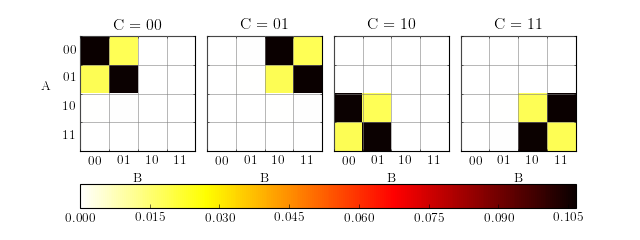

In [14]:
triangle_plot_2(fritz(rvc), None, utils.temp_dir('fritz_dist_plot_bits.pdf'), brazil_mods=True, bits=True)

In [15]:
def fritz_alt(rvc):
    ei = utils.ei
    pi = np.pi
    perm = utils.get_triangle_permutation()
    
    
    # === RHS A ===
    # Eigenvectors of sigma_x
    e_x_0 = (qb0 + ei(0/4*pi)*qb1)/(sqrt2)
    e_x_1 = (qb0 + ei(4/4*pi)*qb1)/(sqrt2)
    # Eigenvectors of sigma_y
    e_y_0 = (qb0 + ei(6/4*pi)*qb1)/(sqrt2)
    e_y_1 = (qb0 + ei(2/4*pi)*qb1)/(sqrt2)
    # =============

    # === LHS B ===
    # Eigenvectors of -(sigma_y + sigma_x)/sqrt2
    e_yx_0 = (qb0 + ei(3/4*pi)*qb1)/(sqrt2)
    e_yx_1 = (qb0 + ei(7/4*pi)*qb1)/(sqrt2)
    # Eigenvectors of (sigma_y - sigma_x)/sqrt2
    e_xy_0 = (qb0 + ei(1/4*pi)*qb1)/(sqrt2)
    e_xy_1 = (qb0 + ei(5/4*pi)*qb1)/(sqrt2)
    # =============
    
    def reph(n, s):
        return (qb0 + ei(float(n)/4*pi)*qb1)/(sqrt2)
    
#     A_m_p = [
#         [qb0, qb0, qb1, qb1], [e_y_1,e_y_0, e_x_0, e_x_1]
#     ]
#     B_m_p = [
#         [e_xy_0, e_xy_1, e_yx_0, e_yx_1], [qb0, qb0, qb1, qb1]
#     ]
    A_m_p = [
        [qb0, qb0, qb1, qb1], [reph(1, 1), reph(5, 1), reph(3, 1), reph(7, 1)]
    ]
    B_m_p = [
        [reph(6, 0), reph(2, 0), reph(0, 0), reph(4, 0)], [qb0, qb0, qb1, qb1]
    ]
    C_m_p = [
        [qb0, qb1, qb0, qb1], [qb0, qb0, qb1, qb1]
    ]
    
    m_p = [A_m_p, B_m_p, C_m_p]
    measurements = []
    for m_p_i in m_p:
        measurement_set = []
        for l, r in zip(m_p_i[0], m_p_i[1]):
            measurement_set.append(utils.tensor(utils.ket_to_dm(l), utils.ket_to_dm(r)))
        measurements.append(measurement_set)
        
    A = Measurement(measurements[0])
    B = Measurement(measurements[1])
    C = Measurement(measurements[2])
    
    rhoAC = rhoBC = State(utils.ket_to_dm(qb00)/2 + utils.ket_to_dm(qb11)/2)
    rhoAB = State.Strats.Deterministic.maximally_entangled_bell(0)

    qc = QuantumContext(random_variables=rvc, measurements=(A,B,C), states=(rhoAB, rhoBC, rhoAC), permutation=perm)
#     print(qc)
    pd = QuantumProbDist(qc)
    return pd

<IPython.core.display.Javascript object>


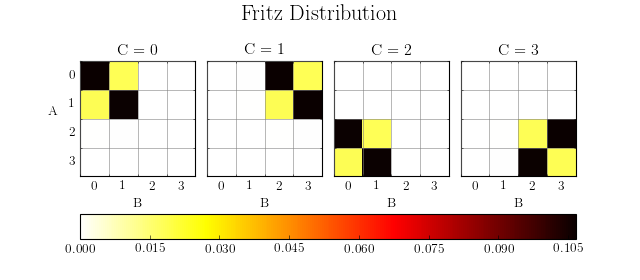

In [281]:
triangle_plot_2(fritz_alt(rvc), 'Fritz Distribution',  bits=False)

<IPython.core.display.Javascript object>


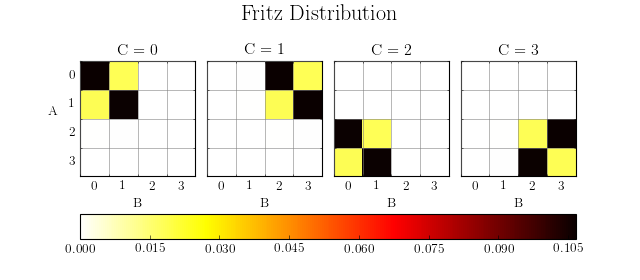

In [194]:
triangle_plot_2(fritz(rvc), 'Fritz Distribution', brazil_mods=True, bits=False)

In [141]:
# cd = np.zeros((4,4,4))
# cd[0, 0, 0] = 1
# cd[0, 1, 2] = 1
# cd[2, 0, 1] = 1
# cd[1, 2, 0] = 1
# cd[1, 2, 3] = 1
# cd[3, 1, 2] = 1
# cd[2, 3, 1] = 1
# cd[2, 3, 0] = 1
# cd[0, 2, 3] = 1
# cd[3, 0, 2] = 1
# cd[3, 0, 1] = 1
# cd[1, 3, 0] = 1
# cd[0, 1, 3] = 1
# cd[3, 3, 3] = 1
# cd /= np.sum(cd)
cd = np.ones((4,4,4))
cd /= np.sum(cd)
custom_dist = ProbDist(rvc, cd)

triangle_plot_2(custom_dist, 'Uniform Distribution', utils.temp_dir('uniform_dist_plot.pdf'), fritz(rvc)._support.max())

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: '/cygdrive/t/GitProjects/quantum_tools/code/cmr12'

<IPython.core.display.Javascript object>


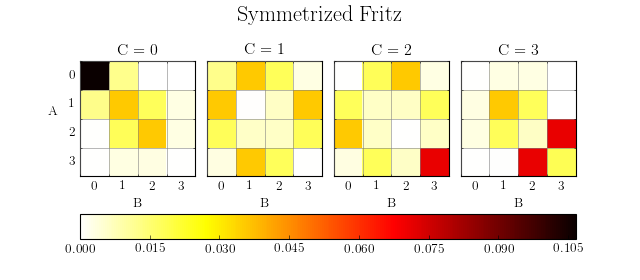

In [373]:
symmetrize_fritz = ProbDist(rvc, np.sum(np.transpose(fritz_alt(rvc)._support, x) for x in permutations((0,1,2)))/6)
triangle_plot_2(symmetrize_fritz, 'Symmetrized Fritz', utils.temp_dir('symmetrized_fritz.pdf'), brazil_mods=False)

## Perfect Correlation

In [15]:
pc_rvc = RandomVariableCollection.new(('A', 'B', 'C'), (2, 2, 2))
cd = np.zeros((2,2,2))
cd[0,0,0] = 1/2
cd[1,1,1] = 1/2
pc = ProbDist(pc_rvc, cd)

In [17]:
print(pc)

=== ProbDist ===
RandomVariableCollection
3 Random Variables:
Outcomes: 8 = 2^3
A -> [0, 1]
B -> [0, 1]
C -> [0, 1]
2 Achievable outcomes.
{outcome} -> {probability}
[0, 0, 0] -> 0.5
[1, 1, 1] -> 0.5


<IPython.core.display.Javascript object>


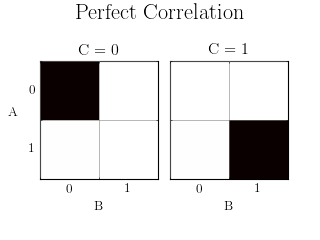

In [47]:
triangle_plot_small(pc, 'Perfect Correlation', utils.temp_dir('perfect_correlation_2_outcomes.pdf'))

In [ ]:
qc = QuantumCaller(None, rvc, triangle_permutation)
qc_ineq = QuantumCaller(w_to_target(transversal_hardy),rvc,triangle_permutation)
qc_match_rs = StateRestrictedQuantumCaller(pd_matching(qc.context(mebs_non_accessible)),rvc,triangle_permutation)
# qc_match = QuantumCaller(pd_matching(target_pd),rvc, triangle_permutation)
qc_ineq_sym = QuantumCaller(w_to_target_sym(MosekCertFritzSym),rvc,triangle_permutation)
qc_ineq_rs = StateRestrictedQuantumCaller(w_to_target_sym(MosekCertFritzSym),rvc,triangle_permutation)
qc_ineq_sym_sym = SymmetricStateSymmetricMeasurementQuantumCaller(w_to_target_sym(GurobiCertFritzSym),rvc,triangle_permutation)
qc_ineq_lu = LocalUnitaryQuantumCaller(w_to_target_sym(gurobicert), rvc, triangle_permutation)
cc = ConvexityCaller(w_to_target(transversal_symmetric_hardy), rvc)

In [13]:
def exchange_parties(pd, how=None):
    support = pd._support
    if how is None: # Exchange parties in all ways
        summed_support = np.zeros(support.shape)
        for i in permutations(range(3)):
            summed_support += support.transpose(i)
        support = summed_support / np.sum(summed_support)
    else:
        support = support.transpose(how)
    return ProbDist(pd._rvc, support)

## Printing Inequalities

In [198]:
brazilrepineq = nosymwitness

In [59]:
def print_ineq_from_w(w):
    return Latex(latex_inequality(w, b_string)).raw
#     return Latex(*[(fts_object[name][:, i].flatten(), b_string) for i in range(fts_object[name].shape[1])])

In [43]:
b_string[0:20]

array(['P_{ABC}(000)P_{ABC}(000)', 'P_{ABC}(000)P_{ABC}(001)', 'P_{ABC}(000)P_{ABC}(002)', 'P_{ABC}(000)P_{ABC}(003)',
       'P_{ABC}(000)P_{ABC}(001)', 'P_{ABC}(001)P_{ABC}(001)', 'P_{ABC}(001)P_{ABC}(002)', 'P_{ABC}(001)P_{ABC}(003)',
       'P_{ABC}(000)P_{ABC}(002)', 'P_{ABC}(001)P_{ABC}(002)', 'P_{ABC}(002)P_{ABC}(002)', 'P_{ABC}(002)P_{ABC}(003)',
       'P_{ABC}(000)P_{ABC}(003)', 'P_{ABC}(001)P_{ABC}(003)', 'P_{ABC}(002)P_{ABC}(003)', 'P_{ABC}(003)P_{ABC}(003)',
       'P_{ABC}(000)P_{ABC}(010)', 'P_{ABC}(000)P_{ABC}(011)', 'P_{ABC}(000)P_{ABC}(012)', 'P_{ABC}(000)P_{ABC}(013)'], 
      dtype='<U24')

In [392]:
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

def side_to_aligned(side, terms, line_break=10):
    latex = get_expression_latex(get_coeff_map(terms, side), None)
    latex_chunks = chunks(latex, line_break)
    latex_file = '+ \\\ \n\t'.join([r' + '.join(lc) for lc in latex_chunks])
    result = "\\begin{{gather*}}\n\t{0}\n\\end{{gather*}}".format(latex_file)
    return result

def print_ineq_from_w_present(coeff_array, terms):
    lhs = np.copy(coeff_array) * -1
    rhs = np.copy(coeff_array)
    lhs[lhs < 0] = 0
    rhs[rhs < 0] = 0

    return side_to_aligned(lhs, terms) + "\n\\[\\leq\\]\n" + side_to_aligned(rhs, terms)

def save_ineq_print(name, coeff_array, terms):
    out = print_ineq_from_w_present(coeff_array, terms)
    out = out.replace('_{ABC}', '')
    with open(utils.temp_dir(name + '_ineq_print.tex'), 'w') as f:
        f.write(out)

In [393]:
save_ineq_print('nosymwitness', nosymwitness, b_string)
# save_ineq_print('MosekCertFritzSym', MosekCertFritzSym.dot(symmetrizingmatrix)/8, b_string)
# save_ineq_print('MosekCertFritzSym', MosekCertFritzSym, [s.replace('_{ABC}', '') for s in sym_b_string])

In [120]:
# def make_sym_b_string():
#     sym_b_string = np.zeros(symmetrizingmatrix.shape[0], dtype='<U32')
#     for r in range(symmetrizingmatrix.shape[0]):
#         for c in range(symmetrizingmatrix.shape[1]):
#             if symmetrizingmatrix[r,c] == 0:
#                 continue
#             else: # its equal to 1
#                 sym_b_string[r] = '[{0}]_{{{1}}}'.format(b_string[c], int(symmetrizingmatrix[r,:].sum())) # /8 is a hack
#                 break
#     return sym_b_string
# sym_b_string = make_sym_b_string()

In [181]:
def save_sym_ineq_print(name, coeff_array, terms):
    shortened_terms = []
    short_coeff_array = []
    for i in range(len(coeff_array)):
        if coeff_array[i] != 0:
            if terms[i] in probabilized_orbits_dict:
                shortened_terms.append(probabilized_orbits_dict[terms[i]][0])
                short_coeff_array.append(coeff_array[i])
            else:
                continue
#     print(shortened_terms)
#     print(short_coeff_array)
    save_ineq_print(name, short_coeff_array, shortened_terms)

In [193]:
save_sym_ineq_print('MosekCertFritzSym', MosekCertFritzSym.dot(symmetrizingmatrix)/8, b_string)

In [190]:
import operator
group_orbiter = [
    operator.itemgetter(*(0,1,2)),
    operator.itemgetter(*(1,0,2)),
    operator.itemgetter(*(1,2,0)),
    operator.itemgetter(*(2,1,0)),
    operator.itemgetter(*(2,0,1)),
    operator.itemgetter(*(0,2,1))
]
def get_reps_sym():
    master_list = [''.join(s) for s in product('0123', repeat=3)]
    hit_list = []
    orbit_list = []
    for term in product(master_list, master_list):
        if term not in hit_list:
            orbit = list(set([(''.join(g(term[0])), ''.join(g(term[1]))) for g in group_orbiter]))
#             orbit = orbit + [(s[1], s[0]) for s in orbit]
            orbit_list.append(orbit)
            hit_list = hit_list + orbit
    probabilized_orbits = [['P_{{ABC}}({})P_{{ABC}}({})'.format(*a) for a in s] for s in orbit_list]
    return probabilized_orbits
probabilized_orbits = get_reps_sym()
probabilized_orbits_dict = dict((a[0], ('[{}]_{{{}}}'.format(a[0],  len(a)), len(a))) for a in probabilized_orbits)

In [191]:
probabilized_orbits_dict

{'P_{ABC}(000)P_{ABC}(000)': ('[P_{ABC}(000)P_{ABC}(000)]_{1}', 1),
 'P_{ABC}(000)P_{ABC}(002)': ('[P_{ABC}(000)P_{ABC}(002)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(003)': ('[P_{ABC}(000)P_{ABC}(003)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(022)': ('[P_{ABC}(000)P_{ABC}(022)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(100)': ('[P_{ABC}(000)P_{ABC}(100)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(102)': ('[P_{ABC}(000)P_{ABC}(102)]_{6}', 6),
 'P_{ABC}(000)P_{ABC}(110)': ('[P_{ABC}(000)P_{ABC}(110)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(111)': ('[P_{ABC}(000)P_{ABC}(111)]_{1}', 1),
 'P_{ABC}(000)P_{ABC}(113)': ('[P_{ABC}(000)P_{ABC}(113)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(211)': ('[P_{ABC}(000)P_{ABC}(211)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(212)': ('[P_{ABC}(000)P_{ABC}(212)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(213)': ('[P_{ABC}(000)P_{ABC}(213)]_{6}', 6),
 'P_{ABC}(000)P_{ABC}(222)': ('[P_{ABC}(000)P_{ABC}(222)]_{1}', 1),
 'P_{ABC}(000)P_{ABC}(232)': ('[P_{ABC}(000)P_{ABC}(232)]_{3}', 3),
 'P_{ABC}(000)P_{ABC}(301)': ('[P_{ABC}(000)P_{A

In [93]:
b_string.dtype

dtype('<U24')

In [118]:
[s.replace('_{ABC}', '') for s in sym_b_string]

['[P(000)P(000)]_{0}',
 '[P(000)P(001)]_{3}',
 '[P(000)P(002)]_{3}',
 '[P(000)P(003)]_{3}',
 '[P(001)P(001)]_{1}',
 '[P(001)P(002)]_{3}',
 '[P(001)P(003)]_{3}',
 '[P(002)P(002)]_{1}',
 '[P(002)P(003)]_{3}',
 '[P(003)P(003)]_{1}',
 '[P(000)P(011)]_{3}',
 '[P(000)P(012)]_{6}',
 '[P(000)P(013)]_{6}',
 '[P(001)P(010)]_{3}',
 '[P(001)P(011)]_{6}',
 '[P(001)P(012)]_{6}',
 '[P(001)P(013)]_{6}',
 '[P(002)P(010)]_{6}',
 '[P(002)P(011)]_{6}',
 '[P(002)P(012)]_{6}',
 '[P(002)P(013)]_{6}',
 '[P(003)P(010)]_{6}',
 '[P(003)P(011)]_{6}',
 '[P(003)P(012)]_{6}',
 '[P(003)P(013)]_{6}',
 '[P(000)P(022)]_{3}',
 '[P(000)P(023)]_{6}',
 '[P(001)P(021)]_{6}',
 '[P(001)P(022)]_{6}',
 '[P(001)P(023)]_{6}',
 '[P(002)P(020)]_{3}',
 '[P(002)P(021)]_{6}',
 '[P(002)P(022)]_{6}',
 '[P(002)P(023)]_{6}',
 '[P(003)P(020)]_{6}',
 '[P(003)P(021)]_{6}',
 '[P(003)P(022)]_{6}',
 '[P(003)P(023)]_{6}',
 '[P(000)P(033)]_{3}',
 '[P(001)P(031)]_{6}',
 '[P(001)P(032)]_{6}',
 '[P(001)P(033)]_{6}',
 '[P(002)P(031)]_{6}',
 '[P(002)P(

In [68]:
newsymcertificate2.dot(symmetrizingmatrix).shape

(16896,)

In [64]:
w_to_target_sym(newsymcertificate2)(fritz(rvc))

-0.070923519428139792

## Local Optimizers

<IPython.core.display.Javascript object>


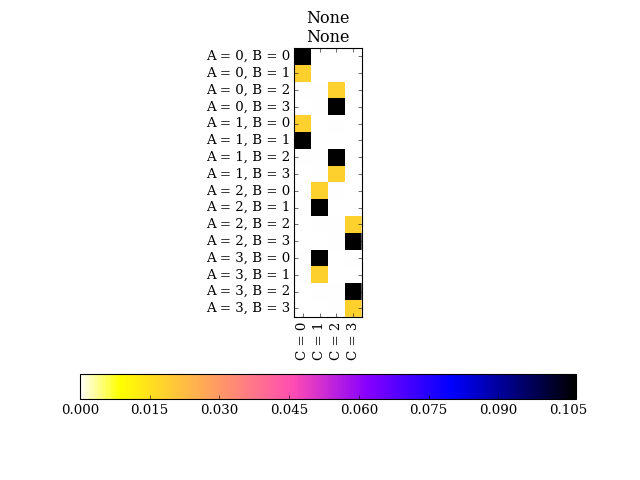

In [16]:
triangle_plot(fritz(rvc))

<IPython.core.display.Javascript object>


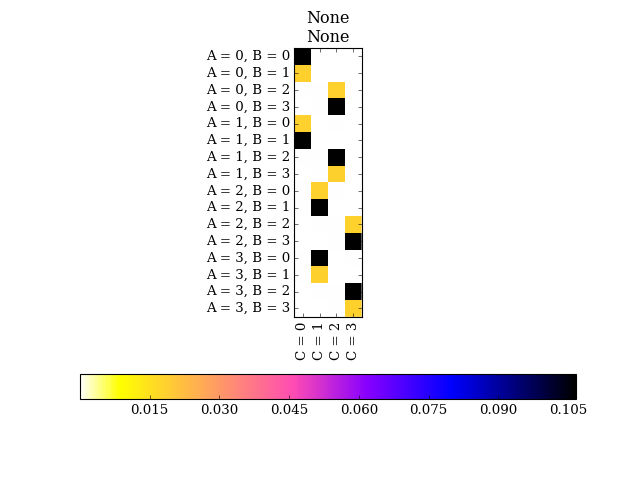

In [37]:
triangle_plot(QuantumCaller(w_to_target(nosymwitness), rvc, triangle_permutation).context(real_fritz_param))

In [24]:
def optimize_stop_below(f, stop):
    def _f_stopped(param):
        value = f(param)
        if value < stop:
            return stop
        else:
            return value
    return _f_stopped

In [15]:
active_qc(np.random.random(active_qc.size)*np.pi)

NameError: name 'active_qc' is not defined

In [43]:
# Cholesky params for MEB
# print(utils.ket_to_dm(utils.mebs[:, 0]))
# cholesky(np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]))
def chol_to_mebs_dist():
    mebs= utils.ket_to_dm(utils.mebs[:, 0])
    seed = np.random.random(16)
    return optimize.minimize(lambda x: np.sum(np.abs(cholesky(x) - mebs)**2), seed, tol=0.01)
    
chol_to_mebs_res = chol_to_mebs_dist()

In [44]:
cholesky(chol_to_mebs_res.x)

array([[ 0.50549+0.j     ,  0.00242-0.00094j,  0.00037+0.00008j,  0.49610+0.00035j],
       [ 0.00242+0.00094j,  0.00619+0.j     , -0.00016+0.00006j, -0.00087+0.00026j],
       [ 0.00037-0.00008j, -0.00016-0.00006j,  0.00002+0.j     ,  0.00056+0.00036j],
       [ 0.49610-0.00035j, -0.00087-0.00026j,  0.00056-0.00036j,  0.50521+0.j     ]])

In [20]:
fritz_q_matcher = QuantumCaller(pd_matching(fritz(rvc)), rvc, triangle_permutation)
fritz_q_matcher_res = optimize.minimize(fritz_q_matcher, np.random.random(3*12 + 3*15)*np.pi, tol=0.01, callback=minimize_callback(fritz_q_matcher))

0.32106746848999673
0.29562083375499537
0.28979613375532287
0.2850311262659104
0.27935511261909857
0.27694590406983943
0.27558815435526096
0.2740973995679631
0.27146819661960214
0.2675372399222567
0.26551632623320837
0.2628665007863378
0.25836032961711236
0.25281760426861905
0.24798934286658222
0.24110289338372712
0.23702174278485472
0.23093514381996977
0.22699293001611406
0.22565067455163462
0.22419795488745178
0.22177173943804818
0.21950440566160662
0.21536268501436504
0.20811370551476643
0.19740577240859145
0.18515272030059557
0.16713409342342173
0.13969681795012448
0.11483157949060308
0.08667205806715399
0.0701101256191612
0.051509276979237295
0.04149547974248358
0.03202773038100404
0.029476322913955542
0.02475351287724399
0.017980328921557567
0.015247421790725765
0.01393438635007015
0.011957644627831982
0.010127204208885257
0.008860266342350058
0.007963916456178844
0.006518628563586716
0.00526231729560382
0.004172979161705865
0.0031747621768109923
0.002724422619785345
0.0024776834

In [222]:
# active_qc = QuantumCaller(pd_matching(fritz(rvc)),rvc,triangle_permutation)
# active_qc = QuantumCaller(pd_matching(custom_dist),rvc,triangle_permutation)
active_qc = QuantumCaller(w_to_target_sym(brazilrepineq),rvc,triangle_permutation)
# x0 = fritz_param[:active_qc.size]
# x0 = np.hstack((res.x[:48], chol_to_mebs_res.x, chol_to_mebs_res.x, chol_to_mebs_res.x))
# x0 = stochastic_jump(res.x, 0.001)[:active_qc.size]
# x0 = stochastic_jump(x0, 0.01)
# x0 = np.random.random(active_qc.size)*np.pi
# x0 = fritz_q_matcher_res.x
x0 = stochastic_jump(fritz_q_matcher_res.x, 0.1)
# x0 = algebraic_support.ravel()
# x0 = np.random.random(active_qc.size)*np.pi
# x0[-len(hh_x)-1:-1] = hh_x
# x0 = np.hstack((measurments_fritz,np.array([np.pi/4,np.pi/4,np.pi/4])))
# x0 = hh_x
# x0 = np.hstack((np.random.normal(0,1,48), mebs_0_param, mebs_0_param, mebs_0_param))
# x0 = np.hstack((np.random.normal(0,1,20), fritz_param[20:active_qc.size]))
print(active_qc(x0))
# res = optimize.minimize(active_qc, x0, tol=0.0001, method=None, callback=minimize_callback(active_qc))
res = optimize.minimize(optimize_stop_below(active_qc, -0.5), x0, tol=0.0001, method=None, callback=minimize_callback(active_qc))

4.53250544602
1.81129642312
0.699192855443
0.181689780622
0.0687463064872
0.0329649883723
0.0182226691969
0.0118629377134
0.00474053207665
0.00273529746809
0.00173150776136
0.00103961048864
0.00058406734329
0.000286008106884
0.000164396823851
0.000101361486627
8.01837947027e-05
6.59316557978e-05
5.50032489866e-05
4.53393023457e-05
3.06167442225e-05
1.892987068e-05
1.36895601173e-05
9.76327579821e-06
6.44838058415e-06
3.99405995791e-06
2.75835374476e-06
2.24554073188e-06
1.96917746298e-06
1.74268389064e-06
1.52321628732e-06
1.32405310074e-06
1.17362759963e-06
1.06516433272e-06
9.55262775835e-07
8.16888695805e-07
6.80308216798e-07
5.92901900002e-07
4.59714310856e-07
3.33021173106e-07
2.66659847028e-07
1.71356651781e-07
9.41206886191e-08


In [209]:
generic_state_measurement_brazilrepineq = result_backlog[-1]

In [211]:
generic_measurement_brazilrepineq = result_backlog[-1]

In [219]:
import pickle

brazilrep_opt = [generic_state_measurement_brazilrepineq, generic_measurement_brazilrepineq]

pickle.dump( brazilrep_opt, open(utils.temp_dir('brazilrep_opt.p'), "wb"))

## Fritz Param

In [346]:
fritz_matcher = QuantumCaller(pd_matching(fritz(rvc)), rvc, triangle_permutation)
x0 = np.random.random(fritz_matcher.size)*2*np.pi
fritz_q_matcher_res = optimize.minimize(fritz_matcher,x0, tol=0.01,callback=minimize_callback(fritz_matcher))

0.31754063907052704
0.29474389291927106
0.27907999934518884
0.255217151201364
0.24963847296294034
0.2120884563558616
0.20561301615534508
0.19493251283115526
0.17869492779116727
0.16441385159103236
0.15516350558702385
0.1393341464439508
0.12087283977138957
0.10731541705087123
0.08349560518386183
0.05090368518903928
0.04139709341088579
0.033808916213953176
0.02542033091069342
0.021461095950838494
0.016467872872476107
0.014248358553191662
0.011984569956937027
0.008967013446588316
0.008190174195916106
0.006893624296749287
0.005274433775655623
0.004426148647298829
0.0037323649217867526
0.0029108852024115513
0.002711330389822147
0.0023971260554785543
0.0020874203690975663
0.0018154462225205194
0.001546444129150084
0.0014318652574196432
0.0012555510837871041
0.0010857780753560956
0.0009191873083308245
0.0007245898683305061
0.0006243115871503455
0.0004902181881074627
0.0004034646471301528
0.00037754458963143407
0.0003306997221368213
0.0002560847543241003
0.00022390650633627633
0.00022114615274

In [344]:
fritz_matcher_bell = StateRestrictedQuantumCaller(pd_matching(fritz(rvc)), rvc, triangle_permutation)
x0 = np.random.random(fritz_matcher_bell.size)*2*np.pi
fritz_q_matcher_bell_res = optimize.minimize(fritz_matcher_bell,x0, tol=0.001,callback=minimize_callback(fritz_matcher_bell))

0.2884064877248178
0.26484567904110995
0.2584391495136018
0.24749029477302914
0.23596383326502193
0.22343996096018745
0.20208306912580046
0.17349001627717917
0.15246660778708382
0.12104212916747766
0.08936501385396381
0.07141428913677549
0.04745478836290079
0.033150474465941625
0.02155383368205423
0.017846991272218657
0.011820077562164391
0.0076307142717112735
0.006729255608178654
0.005166660498137033
0.0027315681953045345
0.0024583258613105397
0.0013962938446022675
0.0011512011723850742
0.0007451231059639413
0.0006709112598946523
0.0005650572828020204
0.00037709692678262
0.00029262619042970926
0.0002093486041213557
0.000166383576916881
0.0001004619234576857
7.472625794256507e-05
5.157342962241971e-05
2.809973704306033e-05
2.2274980147215415e-05
1.5681096284641658e-05
1.2844453436410485e-05
8.8148904012252e-06
6.555782668472048e-06
3.859459805995634e-06
2.9241859067588816e-06
1.6766849381680833e-06
1.1738913855271066e-06
9.611813725493172e-07
7.129757106753788e-07
6.048709255967174e-07

## Pickling Important Things

In [345]:
import pickle
pickle.dump(fritz_q_matcher_res, open(utils.temp_dir('fritz_q_matcher_res.p'), 'wb'))
pickle.load(open(utils.temp_dir('fritz_q_matcher_res.p'), 'rb'))
pickle.dump(fritz_q_matcher_bell_res, open(utils.temp_dir('fritz_q_matcher_bell_res.p'), 'wb'))
pickle.load(open(utils.temp_dir('fritz_q_matcher_bell_res.p'), 'rb'))

      fun: 5.077022744547586e-07
 hess_inv: array([[ 1.91264, -0.55726, -0.54313, ..., -0.12865,  0.40949, -0.84238],
       [-0.55726,  2.25628,  0.20131, ...,  0.09538, -0.07357, -0.18333],
       [-0.54313,  0.20131,  0.55022, ...,  0.01677, -0.28218,  0.4473 ],
       ..., 
       [-0.12865,  0.09538,  0.01677, ...,  1.06083, -0.04892,  0.15932],
       [ 0.40949, -0.07357, -0.28218, ..., -0.04892,  1.38484, -0.52011],
       [-0.84238, -0.18333,  0.4473 , ...,  0.15932, -0.52011,  2.45142]])
      jac: array([ 0.01325,  0.00003,  0.11897, -0.00005,  0.01414, -0.00005,  0.00069, -0.00466,  0.01535, -0.00069,  0.     ,
        0.00299,  0.00003, -0.00006, -0.10437, -0.00065,  0.00148, -0.00015,  0.00009,  0.00009, -0.00297,  0.00065,
        0.     ,  0.00114,  0.00011, -0.00008,  0.00008,  0.     , -0.00008,  0.00011,  0.     , -0.00002, -0.00006,
        0.     ,  0.     ,  0.00005])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 3545
      n

## Gaussian Peturbation Convergence

In [249]:
import pickle
qc = QuantumCaller(w_to_target_sym(newsymcertificate),rvc,triangle_permutation)
run_results = []
perturb_amount = np.linspace(-3, 1, 15) + np.log10(np.linalg.norm(fritz_q_matcher_res.x) / (2 *np.pi))
# mags = [-2]
for i in perturb_amount:
    print('Running with Magnitude {}'.format(i))
    x0 = stochastic_jump(fritz_q_matcher_res.x, 10**(i))
    optimize.minimize(qc, x0, tol=0.0001, method='BFGS', callback=minimize_callback(qc))
    run_results.append(result_backlog[-1])

pickle.dump( run_results, open(utils.temp_dir('gaussian_run_results.p'), "wb"))

Running with Magnitude -3.0
-0.00817084006647
-0.051014035076
-0.116377489561
-0.153659066325
-0.169541784003
-0.182898489763
-0.184872196103
-0.1881002
-0.192503851806
-0.194525114863
-0.195478056677
-0.19645051584
-0.196889787094
-0.197060890897
-0.197116862747
-0.197190831551
-0.197238749698
-0.197274400248
-0.197316384742
-0.197341498453
-0.197367375226
-0.197404764473
-0.197457125447
-0.197487943809
-0.197536052618
-0.197570482228
-0.197618041517
-0.197665818075
-0.19771185204
-0.197724838749
-0.197748983896
-0.197787176562
-0.197836508435
-0.197859897785
-0.19786859578
-0.197876990431
-0.197884238994
-0.197891504546
-0.197897602147
-0.197899588586
-0.197900756937
-0.197901136563
-0.197901770063
-0.197902659782
-0.197902879461
-0.197903244792
-0.197903652804
-0.197903792186
-0.197903927438
-0.197904110906
-0.197904404925
-0.197904828932
-0.197905274417
-0.197905969045
-0.197906937829
-0.197908057961
-0.197909761575
-0.197911923916
-0.197914168769
-0.197916060953
-0.197917513654
-0

<IPython.core.display.Javascript object>


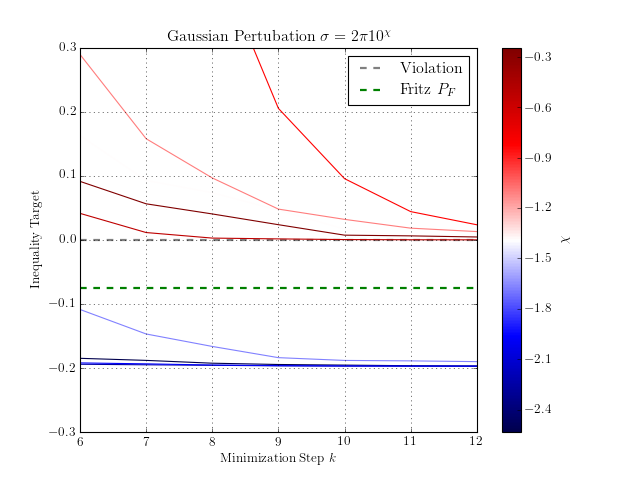

In [306]:
from matplotlib import cm
import matplotlib as mpl
run_results = pickle.load(open(utils.temp_dir('gaussian_run_results.p'), "rb"))

run_results = [run_results[i] for i, p in enumerate(perturb_amount) if p < 0]
perturb_amount = perturb_amount[np.where(perturb_amount < 0)]

plt.figure()
plt.xlabel('Minimization Step $k$')
plt.ylabel('Inequality Target')
plt.title('Gaussian Pertubation $\sigma = 2 \pi 10^{\chi}$')

plot_elems = []
# Color Bar
s_m = mpl.cm.ScalarMappable(
    cmap=cm.get_cmap('seismic'),
#     cmap=cm.get_cmap('RdYlBu'),
    norm=mpl.colors.Normalize(
        vmin=np.min(perturb_amount),
        vmax=np.max(perturb_amount),
    ))
s_m.set_array([])

plot_elems.append(plt.axhline(0, color='gray', linestyle='dashed', linewidth=2))
plot_elems.append(plt.axhline(qc(fritz_q_matcher_res.x), color='green', linestyle='dashed', linewidth=2))

for i, run in enumerate(run_results):
    plot_elems.append(plt.plot(np.arange(len(run)), run, color=s_m.to_rgba(perturb_amount[i]))[0])

plt.grid(True)
plt.colorbar(s_m,label='$\chi$')

plt.legend(plot_elems, ['Violation', 'Fritz $P_{F}$'])

# Default
plt.xlim([0, 15])

plt.savefig(utils.temp_dir('Gaussian_Perturbation_Fritz_Color_Default.pdf'), format='pdf')

# Zoomed
plt.xlim([6, 12])
plt.ylim([-0.3, 0.3])

plt.savefig(utils.temp_dir('Gaussian_Perturbation_Fritz_Color_Zoomed.pdf'), format='pdf')

plt.show()

## Comparing Parameters

In [363]:
import pickle
qc_none = QuantumCaller(w_to_target_sym(newsymcertificate),rvc,triangle_permutation)
qc_state = StateRestrictedQuantumCaller(w_to_target_sym(newsymcertificate),rvc,triangle_permutation)
none_run_results = []
state_run_results = []
num_runs = 10
for i in range(num_runs):
    print('Running No Restricted {}'.format(i))
    x0 = stochastic_jump(fritz_q_matcher_res.x, 0.01)
#     x0 = np.random.random(qc_none.size)*2*np.pi
    optimize.minimize(qc_none, x0, tol=0.01, method='BFGS', callback=minimize_callback(qc_none))
    none_run_results.append(result_backlog[-1])
    
for i in range(num_runs):
    print('Running State Restricted {}'.format(i))
    x0 = stochastic_jump(fritz_q_matcher_bell_res.x, 0.01)
#     x0 = np.random.random(qc_state.size)*2*np.pi
    optimize.minimize(qc_state, x0, tol=0.01, method='BFGS', callback=minimize_callback(qc_state))
    state_run_results.append(result_backlog[-1])

pickle.dump( [none_run_results, state_run_results], open(utils.temp_dir('comparing_parameters_runs.p'), "wb"))

Running No Restricted 0
-0.0327380337162
-0.13052843554
-0.167747656659
-0.182299756623
-0.188993045672
-0.192118813356
-0.194618096435
-0.195855467338
-0.196203182462
-0.196765585553
-0.196990592984
-0.197287508302
-0.197603092948
-0.197764577924
-0.19782906053
-0.197852805834
-0.197883601087
Running No Restricted 1
-0.0251306092781
-0.109565526951
-0.142116028506
-0.176646094824
-0.188073164557
-0.192943569618
-0.194643411889
-0.195844305
-0.196153230791
-0.196626560379
-0.197283852848
-0.197498169946
-0.197616156074
-0.197789411363
-0.197815780044
-0.197849488614
-0.197882113088
Running No Restricted 2
0.000198941794267
-0.11110953754
-0.159408917412
-0.177792429137
-0.186917083779
-0.189951120894
-0.192868375229
-0.194969352495
-0.195801568659
-0.19683527311
-0.197317445546
-0.197635194323
-0.197730985178
-0.197768254457
-0.197828699596
-0.197866976598
-0.197902304036
Running No Restricted 3
-0.0127981556659
-0.121015016117
-0.15835753141
-0.177304724326
-0.187491610689
-0.19159588

<IPython.core.display.Javascript object>


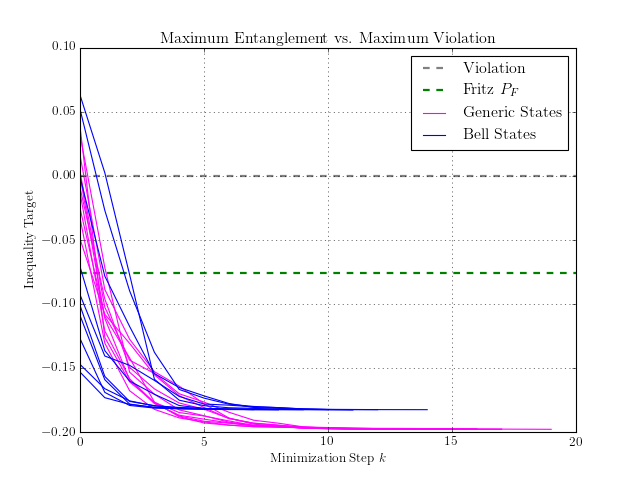

In [365]:
from matplotlib import cm
import matplotlib as mpl
none_run_results, state_run_results = pickle.load(open(utils.temp_dir('comparing_parameters_runs.p'), "rb"))

plt.figure()
plt.xlabel('Minimization Step $k$')
plt.ylabel('Inequality Target')
plt.title('Maximum Entanglement vs. Maximum Violation')

plot_elems = []

plot_elems.append(plt.axhline(0, color='gray', linestyle='dashed', linewidth=2))
plot_elems.append(plt.axhline(qc(fritz_q_matcher_res.x), color='green', linestyle='dashed', linewidth=2))

for i, run in enumerate(none_run_results):
    plot_elem, = plt.plot(np.arange(len(run)), run, color='magenta')
    if i == 0:
        plot_elems.append(plot_elem)
        
for i, run in enumerate(state_run_results):
    plot_elem, = plt.plot(np.arange(len(run)), run, color='blue')
    if i == 0:
        plot_elems.append(plot_elem)        

plt.grid(True)

plt.legend(plot_elems, ['Violation', 'Fritz $P_{F}$', 'Generic States', 'Bell States'])

# Default
# plt.xlim([0, 15])

plt.savefig(utils.temp_dir('Max_Entanglement_vs_Max_Violation_fritz_seed.pdf'), format='pdf')
# plt.savefig(utils.temp_dir('Max_Entanglement_vs_Max_Violation_random_seed.pdf'), format='pdf')

# Zoomed
# plt.xlim([8, 14])
# plt.ylim([-0.3, 0.3])

# plt.savefig(utils.temp_dir('Max_Entanglement_vs_Max_Violation_fritz_seed_Zoomed.pdf'), format='pdf')
# plt.savefig(utils.temp_dir('Max_Entanglement_vs_Max_Violation_random_seed_Zoomed.pdf'), format='pdf')

plt.show()

In [352]:
none_run_results, state_run_results

([[0.018695641617763492,
   -0.11316032030706114,
   -0.15705057382128929,
   -0.16626156940973691,
   -0.17493876634248073,
   -0.18663937774885686,
   -0.191705666808763,
   -0.19422916109907717,
   -0.19567008288449561,
   -0.19658519031891852,
   -0.19704408089258163,
   -0.19717524179349055,
   -0.19737131318382206,
   -0.19754376425698306,
   -0.19766694725666845,
   -0.19771316263828542,
   -0.19777131421103666]],
 [[-0.10149124227267248,
   -0.15582093304859668,
   -0.17699764623860492,
   -0.17983449148712605,
   -0.18113451988005091,
   -0.18161346948988799,
   -0.18201303630198684,
   -0.1824671820061099,
   -0.18256167922807487,
   -0.1825749204319056]])

In [216]:
def plot_violation_results(result_array, legend_array):
    plt.figure()
    plt.xlabel('Minimization Step $k$')
    plt.ylabel('Inequality Target')
    plt.title('Results')
    plot_elems = []
    for result in result_array:
        plot_elems.append(plt.plot(np.arange(len(result)), result)[0])
#     plt.axis([0, len(results), results.min(), results.max()])
    plt.grid(True)
    plt.legend(plot_elems, legend_array)
    plt.show()
    
plot_violation_results(pickle.load(open(utils.temp_dir('brazilrep_opt.p'), "rb")), ['None', 'Bell States'])

## Uniform Noise

In [282]:
w_to_target(nosymwitness)(fritz(rvc))

-0.012944173824159206

In [283]:
def pd_with_uniform_noise(pd, ep):
    uniform_support = np.ones(shape=pd._support.shape)
    uniform_support /= uniform_support.sum()
    return ProbDist(pd._rvc, (1 - ep) * pd._support + ep * uniform_support)

In [321]:
pd_with_uniform_noise(fritz(rvc), 0.3)

In [341]:
max_noise / 64

array([ 0.00133])

<IPython.core.display.Javascript object>


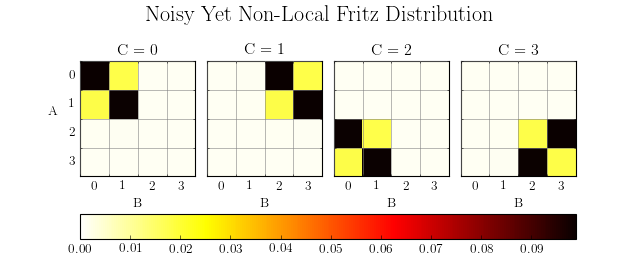

In [339]:
max_noise = ep_span[np.where(I_P_ep[1][1:]*I_P_ep[1][:-1] < 0)]
triangle_plot_2(pd_with_uniform_noise(fritz(rvc), max_noise), title='Noisy Yet Non-Local Fritz Distribution', save=utils.temp_dir('noisy_yet_non_local_fritz.pdf'), brazil_mods=True)

In [284]:
# w_to_target()(pd_with_uniform_noise(fritz(rvc), 0.03))
ineqs_to_test = [
    w_to_target(transversal_hardy),
    w_to_target(nosymwitness),
    w_to_target_sym(newsymcertificate),
    w_to_target_sym(newsymcertificate2)
]

In [328]:
I_P_ep[1]

array([-0.01294, -0.01216, -0.01139, -0.01061, -0.00984, -0.00907, -0.00831, -0.00755, -0.00679, -0.00603, -0.00528,
       -0.00453, -0.00378, -0.00304, -0.0023 , -0.00156, -0.00082, -0.00009,  0.00064,  0.00137,  0.00209,  0.00281,
        0.00353,  0.00424,  0.00495,  0.00566,  0.00637,  0.00707,  0.00777,  0.00847,  0.00916,  0.00985,  0.01054,
        0.01123,  0.01191,  0.01259,  0.01326,  0.01394,  0.01461,  0.01528,  0.01594,  0.0166 ,  0.01726,  0.01792,
        0.01857,  0.01922,  0.01986,  0.02051,  0.02115,  0.02179,  0.02242,  0.02305,  0.02368,  0.02431,  0.02493,
        0.02555,  0.02617,  0.02678,  0.02739,  0.028  ,  0.02861,  0.02921,  0.02981,  0.03041,  0.031  ,  0.03159,
        0.03218,  0.03276,  0.03334,  0.03392,  0.0345 ,  0.03507,  0.03564,  0.03621,  0.03677,  0.03733,  0.03789,
        0.03845,  0.039  ,  0.03955,  0.04009,  0.04064,  0.04118,  0.04171,  0.04225,  0.04278,  0.04331,  0.04383,
        0.04436,  0.04488,  0.04539,  0.04591,  0.04642,  0.0469

array([ 0.08543])

<IPython.core.display.Javascript object>


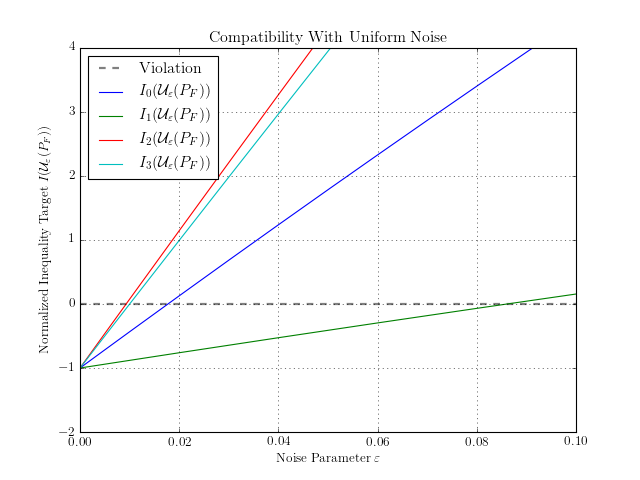

In [293]:
import matplotlib as mpl

# Inequality to test
I = ineqs_to_test
P_0 = fritz(rvc)
ep_span = np.linspace(0, 1, 200)
I_P_ep = [np.array([I_i(pd_with_uniform_noise(P_0, ep)) for ep in ep_span]) for I_i in I]

plt.figure()
plt.xlabel(r'Noise Parameter $\varepsilon$')
plt.ylabel(r'Normalized Inequality Target $I(\mathcal{U}_{\varepsilon}(P_F))$')
plt.title(r'Compatibility With Uniform Noise')

plot_elems = []

plot_elems.append(plt.axhline(0, color='gray', linestyle='dashed', linewidth=2))
# plot_elems.append(plt.axhline(I(P_0), color='green', linestyle='dashed', linewidth=2))
for I_P_ep_i in I_P_ep:
    plot_elems.append(plt.plot(ep_span, -I_P_ep_i/I_P_ep_i.min())[0])

plt.grid(True)

plt.legend(plot_elems, [r'Violation'] + [r'$I_{}(\mathcal{{U}}_{{\varepsilon}}(P_F))$'.format(i) for i in range(len(ineqs_to_test))], loc='best')




In [320]:
# plt.savefig(utils.temp_dir('four_rep_inequalities_uniform_noise.pdf'), format='pdf')
plt.xlim([0, 0.10])
plt.ylim([-2, 4])
plt.savefig(utils.temp_dir('four_rep_inequalities_uniform_noise_zoomed.pdf'), format='pdf')

<IPython.core.display.Javascript object>


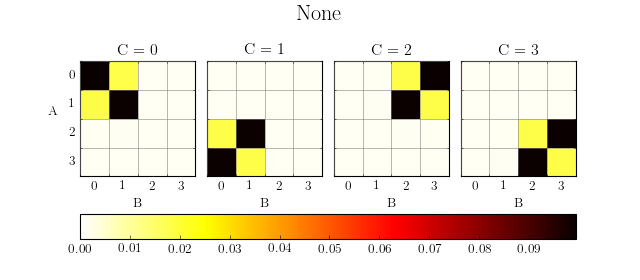

In [229]:
triangle_plot_2(pd_with_uniform_noise(fritz(rvc), 0.08))

In [22]:
I = w_to_target(transversal_hardy)

qc_I = QuantumCaller(I, rvc, triangle_permutation)
res_I = optimize.minimize(qc_I, stochastic_jump(fritz_q_matcher_res.x, 0.01), callback=minimize_callback(qc_I))

0.00231935265847
-0.00177208917045
-0.00227358040726
-0.00302622289809
-0.00334534382979
-0.00342378913633
-0.00354817292326
-0.00364230152499
-0.00367063451848
-0.00371437981681
-0.00374760026174
-0.00376220925592
-0.00378452930821
-0.00380479327853
-0.00381469082094
-0.00382122159935
-0.00382487193283
-0.00382793400188
-0.00382983240218
-0.00383137568775
-0.00383329600364
-0.00383606453994
-0.00383905890661
-0.00384139385571
-0.00384310978436
-0.00384481820663
-0.00384658780995
-0.00384786383185
-0.00384850307677
-0.00384886119459
-0.00384916297019
-0.00384939841617
-0.00384955934146
-0.00384969693379
-0.00384984961508
-0.00384999976869
-0.00385011688556
-0.00385020279029
-0.00385027217336
-0.00385032429858
-0.00385035812686
-0.00385038492866
-0.00385041574801
-0.0038504500699
-0.00385047973209
-0.00385050321581
-0.00385052679409
-0.00385055302189
-0.00385057459011
-0.00385058676031
-0.00385059410825
-0.00385060143261
-0.00385060865828
-0.00385061342509
-0.00385061587888


In [23]:
violation_ratio = I(qc_I.context(res_I.x)) / I(qc_I.context(fritz_q_matcher_res.x))

In [24]:
violation_ratio

1.5009305931719348

<IPython.core.display.Javascript object>


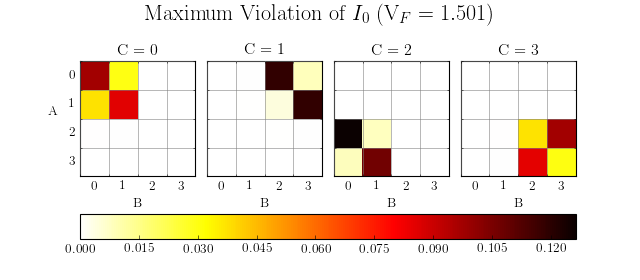

In [27]:
triangle_plot_2(qc_I.context(res_I.x), r'Maximum Violation of $I_0$ (V_F = 1.501)', utils.temp_dir('plotted_dist_I_0_max_violation.pdf'), brazil_mods=True)# pd_hardy = qc_I.context(stochastic_jump(res_I.x, 0.005))
# print(w_to_target_sym(newsymcertificate)(pd_hardy))
# triangle_plot_2(pd_hardy)

In [36]:
noisy_x = stochastic_jump(res_I.x,0.005)
I(qc_I.context(noisy_x))

0.063485974238998641

<IPython.core.display.Javascript object>


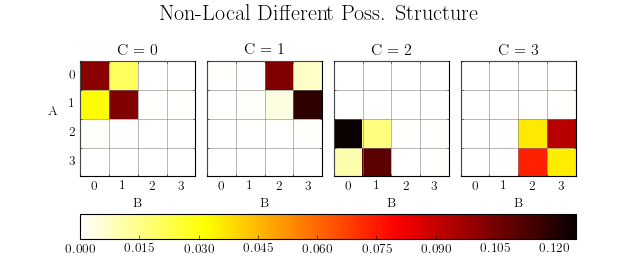

In [35]:
triangle_plot_2(qc_I.context(noisy_x), r'Non-Local Different Poss. Structure', utils.temp_dir('plotted_dist_poss_structure.pdf'), brazil_mods=True)# pd_hardy = qc_I.context(stochastic_jump(res_I.x, 0.005))

<IPython.core.display.Javascript object>


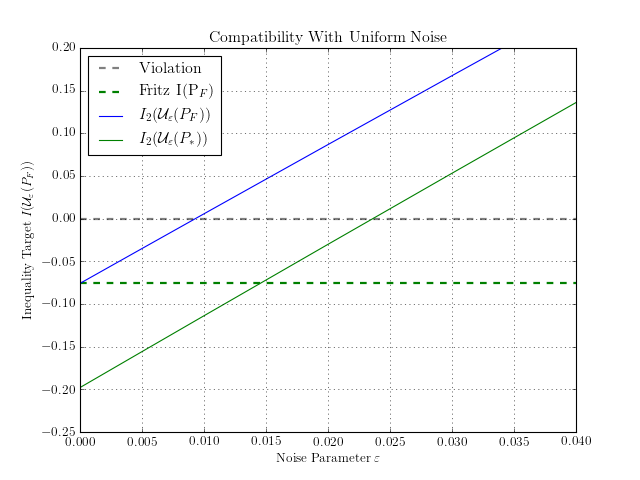

In [290]:
import matplotlib as mpl

P_0 = fritz(rvc)
ep_span = np.linspace(0, 1, 200)
I_P_ep = [
    np.array([I(pd_with_uniform_noise(P_0, ep)) for ep in ep_span]),
    np.array([I(pd_with_uniform_noise(qc_I.context(res_I.x), ep)) for ep in ep_span]),
]

plt.figure()
plt.xlabel(r'Noise Parameter $\varepsilon$')
plt.ylabel(r'Inequality Target $I(\mathcal{U}_{\varepsilon}(P_F))$')
plt.title(r'Compatibility With Uniform Noise')

plot_elems = []

plot_elems.append(plt.axhline(0, color='gray', linestyle='dashed', linewidth=2))
plot_elems.append(plt.axhline(I(P_0), color='green', linestyle='dashed', linewidth=2))
for I_P_ep_i in I_P_ep:
    plot_elems.append(plt.plot(ep_span, I_P_ep_i)[0])

plt.grid(True)

plt.legend(plot_elems, [r'Violation', r'Fritz I(P_{F})'] + [r'$I_{2}(\mathcal{{U}}_{{\varepsilon}}(P_F))$', r'$I_{2}(\mathcal{{U}}_{{\varepsilon}}(P_*))$'], loc='best')

plt.xlim([0, 0.04])
plt.ylim([-0.25, 0.2])
plt.savefig(utils.temp_dir('Compatibility_noise_I_2_max_and_fritz_zzomed.pdf'), format='pdf')


plt.show()